In [1]:
#question 1
import nsfg

In [2]:
resp=nsfg.ReadFemResp()

In [3]:
#for timesmar 
timesmar=resp['timesmar'].dropna()
print timesmar

1       2.0
2       1.0
5       1.0
8       1.0
10      1.0
11      1.0
12      1.0
13      2.0
14      1.0
16      1.0
17      1.0
19      1.0
21      1.0
22      1.0
23      1.0
24      1.0
27      1.0
28      1.0
29      1.0
30      1.0
31      1.0
33      1.0
34      1.0
35      1.0
36      1.0
38      1.0
42      2.0
43      1.0
44      1.0
45      2.0
       ... 
7583    1.0
7590    1.0
7591    1.0
7593    1.0
7598    2.0
7599    3.0
7601    1.0
7603    1.0
7605    1.0
7606    1.0
7607    3.0
7608    1.0
7609    4.0
7612    1.0
7614    1.0
7616    2.0
7617    1.0
7618    1.0
7619    1.0
7620    1.0
7624    1.0
7629    1.0
7630    1.0
7632    1.0
7633    1.0
7634    1.0
7635    1.0
7636    1.0
7637    1.0
7638    2.0
Name: timesmar, Length: 4126, dtype: float64


In [4]:
mean_timesmar=resp['timesmar'].dropna().mean()
print mean_timesmar

1.38705768299


In [5]:
std_timesmar=resp['timesmar'].dropna().std()
print std_timesmar

4.29711302325


In [6]:
#for jintendn
jintendn=resp['jintendn'].dropna()
print jintendn


11      1.0
12      2.0
13      1.0
25      3.0
29      2.0
43      1.0
45      1.0
48      2.0
51      2.0
57      2.0
58      2.0
60      2.0
74      1.0
81      1.0
85      1.0
88      2.0
91      5.0
100     4.0
104     1.0
116     5.0
121     2.0
127     1.0
128     1.0
140     2.0
141     1.0
150     2.0
169     1.0
183     1.0
196     1.0
197     3.0
       ... 
7463    1.0
7471    2.0
7487    1.0
7488    1.0
7490    5.0
7498    1.0
7505    1.0
7507    4.0
7528    3.0
7529    2.0
7533    1.0
7534    2.0
7537    2.0
7542    1.0
7547    2.0
7552    3.0
7558    1.0
7559    2.0
7567    2.0
7572    2.0
7573    1.0
7583    2.0
7591    1.0
7596    2.0
7597    2.0
7614    2.0
7617    2.0
7620    1.0
7623    2.0
7638    2.0
Name: jintendn, Length: 1408, dtype: float64


In [7]:
mean_jintendn=resp['jintendn'].dropna().mean()
print mean_jintendn

2.70525568182


In [8]:
std_jintendn=resp['jintendn'].dropna().std()
print std_jintendn

9.71010805146


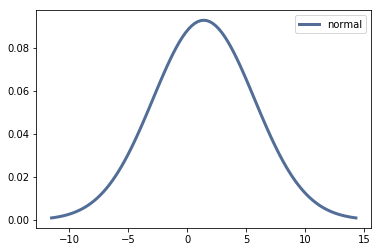

In [9]:
#question 3
#pdf for timesmar
import thinkstats2
import thinkplot
timesmar_normalizedpdf = thinkstats2.NormalPdf(mean_timesmar, std_timesmar)
thinkplot.Pdf(timesmar_normalizedpdf, label='normal')
thinkplot.Show()

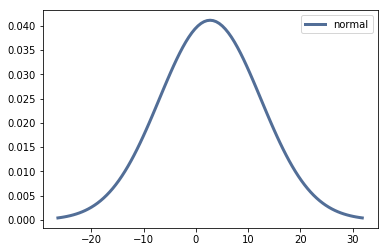

In [10]:
# pdf for jintendn
jintendn_normalizedpdf = thinkstats2.NormalPdf(mean_jintendn, std_jintendn)
thinkplot.Pdf(jintendn_normalizedpdf, label='normal')
thinkplot.Show()

plot shows max normalize prob density is approximately 0.1 for timesmar
other plot shows max normalize prob density is approximately 0.042 for jintendn

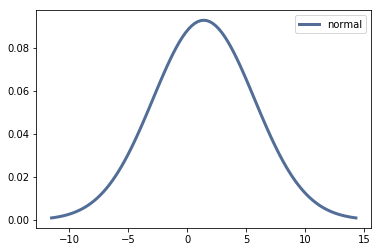

In [11]:
#5
timesmar_pdf = thinkstats2.NormalPdf(resp['timesmar'].mean(), resp['timesmar'].std())
thinkplot.Pdf(timesmar_pdf, label='normal')
thinkplot.Show()

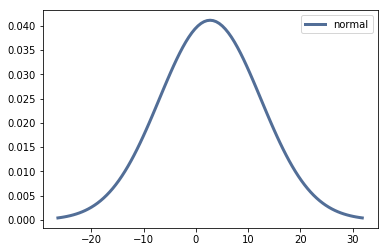

In [12]:
jintendn_pdf = thinkstats2.NormalPdf(resp['jintendn'].mean(), resp['jintendn'].std())
thinkplot.Pdf(jintendn_pdf, label='normal')
thinkplot.Show()

In [13]:
#6
#skewness
import chapter06ex
timesmar_skewness=chapter06ex.Skewness(resp['timesmar'].dropna())
print timesmar_skewness
jintendn_skewness=chapter06ex.Skewness(resp['jintendn'].dropna())
print jintendn_skewness

22.2193072207
9.68691405793


In [14]:
#pearson median skewness
timesmar_pm_skewness=chapter06ex.PearsonMedianSkewness(resp['timesmar'].dropna())
print timesmar_pm_skewness
jintendn_pm_skewness=chapter06ex.PearsonMedianSkewness(resp['jintendn'].dropna())
print jintendn_pm_skewness

0.27025442021
0.527036842972


#7
Skewness of timesmar is bigger than pearson median skewness of it.
Again, Skewness of jintendn is larger than pearson median skewness of it.

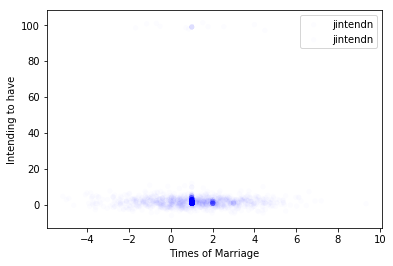

In [15]:
#drawing scatter plot
#8
times_of_mar, intend_to_have = resp.timesmar, resp.jintendn
thinkplot.Scatter(times_of_mar, intend_to_have, alpha=0.01)
times_of_mar = thinkstats2.Jitter(times_of_mar, 2)
intend_to_have = thinkstats2.Jitter(intend_to_have, 2)
thinkplot.Scatter(times_of_mar, intend_to_have, alpha=0.01)
thinkplot.Show(xlabel='Times of Marriage', ylabel='Intending to have')

In [17]:
#plotting percentiles
#9
import numpy as np
cleaned=resp.dropna(subset=['timesmar','jintendn'])
bins = np.arange(135,210,5)
indices = np.digitize(cleaned.timesmar, bins)
groups = cleaned.groupby(indices)
for i, group in groups:
    print(i, len(group))


(0L, 1074)


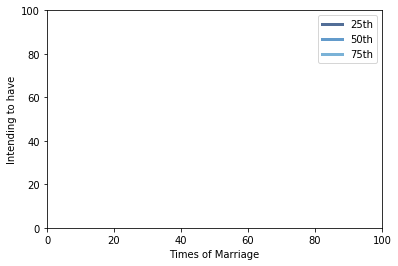

In [18]:
mean_timesmar = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]
for percent in [25, 50, 75]:
    jintendn_percentile = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_timesmar, jintendn_percentile, label=label)
    thinkplot.Config(xlabel='Times of Marriage',ylabel='Intending to have',axis=[0, 100, 0, 100],legend=True)
thinkplot.Show()

In [19]:
import scipy

In [20]:
#11
pearsoncorr=scipy.stats.pearsonr(resp['timesmar'],resp['jintendn'])
print pearsoncorr

(nan, 1.0)


C:\Users\nursenakarakas\AppData\Roaming\Python\Python27\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [22]:

spearm_corr=scipy.stats.spearmanr(resp['timesmar'].dropna(),resp['jintendn'].dropna(),axis=0)
print spearm_corr

ValueError: all the input array dimensions except for the concatenation axis must match exactly